In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("/content/202007-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [50]:
#system requirement and prerequisites
info = pd.read_csv("/content/system_information.csv") 
info.head()

,data__language,data__system_id,data__timezone,data__operator,data__license_url,data__purchase_url,data__short_name,data__name,data__phone_number,data__start_date,data__url,data__email,last_updated,ttl
0,es,cabi,America/New_York,"Motivate International, Inc.",NaN,https://secure.capitalbikeshare.com/register/,Capital Bikeshare,Capital Bikeshare,1-877-430-BIKE,2010-09-20,http://www.capitalbikeshare.com,customerservice@capitalbikeshare.com,1599426730,5


In [51]:
regions = pd.read_csv("/content/system_regions.csv") 
regions.head()

,data__regions__region_id,data__regions__name,last_updated,ttl
0,40,"Alexandria, VA",1.599427e+09,5.0
1,41,"Arlington, VA",NaN,NaN
2,42,"Washington, DC",NaN,NaN
3,43,"Montgomery County, MD (North)",NaN,NaN
4,44,"Montgomery County, MD (South)",NaN,NaN


In [52]:
calendar = pd.read_csv("/content/system_calendar.csv") 
calendar.head()

,data__calendars__start_day,data__calendars__end_day,data__calendars__end_month,data__calendars__start_month,last_updated,ttl
0,1,31,12,1,1599426770,5


In [53]:
hours = pd.read_csv("/content/system_hours.csv") 
hours.head()

,last_updated,ttl
0,1599426760,5


In [54]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [55]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96298 entries, 0 to 96297
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96298 non-null  object 
 1   rideable_type       96298 non-null  object 
 2   started_at          96298 non-null  object 
 3   ended_at            96298 non-null  object 
 4   start_station_name  93088 non-null  object 
 5   start_station_id    93087 non-null  float64
 6   end_station_name    92203 non-null  object 
 7   end_station_id      92203 non-null  float64
 8   start_lat           96297 non-null  float64
 9   start_lng           96297 non-null  float64
 10  end_lat             95950 non-null  float64
 11  end_lng             95950 non-null  float64
 12  member_casual       96297 non-null  object 
dtypes: float64(6), object(7)
memory usage: 9.6+ MB
None


In [56]:
#different ride_id generated while bike ride by user
ride_id_no = data['ride_id'].unique()
print(ride_id_no)
print(len(ride_id_no))

['40166AEE48DB264F' 'C2D80D65DEB2C464' 'FBE8E99BAAED0455' ...
 '22CCF14B92497219' 'ECCCF225BD250237' '61EE5888F84BD6B0']
96298


In [57]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [58]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

['Potomac Ave & Half St SW' 'Maine Ave & 9th St SW' nan '23rd & M St NW'
 'Wilson Blvd & N Uhle St' 'Columbia & Ontario Rd NW'
 'Georgia & Missouri Ave NW' 'Connecticut Ave & Yuma St NW'
 'Offutt Ln & Chevy Chase Dr' '11th & Kenyon St NW'
 'Rhode Island & Connecticut Ave NW'
 'Ballston Metro / Stuart St & 9th St N' '12th & Newton St NE'
 'Crystal Dr & 23rd St S'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir' '4th St & K St NW'
 'East West Hwy & Blair Mill Rd' 'E Fairfax St & S Washington St'
 '8th & O St NW' 'Wakefield High School' '8th & F St NE'
 '14th & Rhode Island Ave NW' 'Georgia Ave and Fairmont St NW'
 'Court House Metro / 15th St & N Uhle St'
 '39th & Calvert St NW / Stoddert' '36th & Calvert St NW / Glover Park'
 '16th & R St NW' '4th & M St SW' '14th & Irving St NW' 'Lincoln Memorial'
 'Roosevelt Island' 'Dunn Loring Metro' '1st & H St NW'
 '3rd & Tingey St SE' 'Branch & Pennsylvania Ave SE'
 'Eastern Market Metro / Pennsylvania Ave & 7th St SE' 'Anacostia Metro'
 '

In [59]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[570. 548.  nan 533. 171. 517. 414. 444. 342.  15. 155. 249.  56.  12.
 321. 456. 332. 618. 413. 220. 294.  27.  31. 390. 109. 107. 430.  21.
 461. 277. 228. 603. 366. 322.  36. 120.  46. 551. 516. 148. 302. 642.
 173. 463. 358. 433.  85. 599. 666. 338.  77. 398.  20. 631. 222. 590.
 544.  83. 193. 648. 502.  73.  57. 408. 159. 296. 188.   1.  24. 133.
 110. 639. 567. 442.  58. 651.  97. 156. 653. 581. 246.  61. 367. 300.
  99. 662. 201.  18. 191. 183. 132. 290. 357. 157. 297. 100.  25.  64.
   4. 396.  87.  90. 167. 629. 394. 195. 130. 626. 552.  84. 452. 250.
 293. 202. 299.  89. 583. 646. 566. 381. 231.  45. 281. 105. 432. 492.
 372.  17. 513. 553. 104. 382. 412. 490. 177. 194. 217. 128. 146. 236.
 108. 218. 434. 337. 180. 353. 592.  86.  65. 238. 314. 429. 436. 248.
 245. 174. 454. 577.  55. 509. 138.  96.  80. 169.  33.  14. 226. 355.
 356. 368. 137. 306.  95. 496. 418. 638.  68. 439.  23. 636. 365. 482.
 234. 669. 313. 334.  60. 491. 291. 319. 410. 189.  16. 200. 578.  26.
 644. 

In [60]:
#different end station name
end_station_name_no = data['end_station_name'].unique()
print(end_station_name_no)
print('no. of end_station_name-')
print(len(end_station_name_no))

['4th & M St SW' 'Maine Ave & 9th St SW' nan 'Wilson Blvd & N Uhle St'
 '14th St & Colorado Ave NW' 'Grant Circle' 'Connecticut Ave & Yuma St NW'
 'Maryland Ave & 17th St NE' 'C & O Canal & Wisconsin Ave NW'
 '11th & Kenyon St NW' 'Pershing Dr & N George Mason Dr'
 '12th & Newton St NE' '12th & Irving St NE' 'Crystal Dr & 23rd St S'
 '3rd St & Pennsylvania Ave SE' '39th & Veazey St NW'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir' '15th & M St NW'
 'Connecticut Ave & Newark St NW / Cleveland Park'
 'E Fairfax St & S Washington St' '7th & R St NW / Shaw Library'
 'Court House Metro / 15th St & N Uhle St'
 'Smithsonian-National Mall / Jefferson Dr & 12th St SW'
 'Wakefield High School' 'Columbia Rd & Georgia Ave NW'
 'Columbia & Ontario Rd NW' '39th & Calvert St NW / Stoddert'
 'Georgia Ave and Fairmont St NW' 'King Greenleaf Rec Center'
 '1st & M St NE' 'Roosevelt Island'
 'Merrifield Cinema & Merrifield Town Center'
 'Rhode Island & Montana Ave NE'
 'Eastern Market Metro / Pe

In [61]:
#different end station ID
end_station_id_no = data['end_station_id'].unique()
print(end_station_id_no)
print('no. of end_station_id-')
print(len(end_station_id_no))

[ 21. 548.  nan 171.  90. 633. 444. 590. 127.  15. 234.  56. 297.  12.
 302. 111. 321. 526. 108. 618. 183. 390. 186. 220.  77. 517. 109.  31.
 587.  65. 228. 628. 629. 120.  24. 193. 399. 163. 173. 133.  89. 453.
 583.  16. 218. 222. 418. 100.  78. 648. 294. 502.  64.  84. 516. 368.
 159. 188. 296.   1.  60. 110. 342. 567. 566. 638.  41. 654. 482. 137.
 246. 248. 367. 412. 115. 662. 631.  18. 199. 191. 132. 195. 357. 157.
  25.  14.   3. 396. 656. 551. 577. 167. 461. 130. 394. 114.  80.  86.
 491. 250. 652. 135. 289. 249.  99.  43. 140. 192. 586. 360. 356. 536.
 105. 372. 339. 513.  95. 428. 462.  55. 136. 153.  46. 177. 217.  26.
  97. 231. 497. 544.  76. 496. 413. 349. 189. 292. 592. 184. 492. 299.
 454. 314. 452. 181. 141. 102. 581. 647.  17. 507. 185.  74.  58. 131.
 334. 179. 322. 138.  82. 607.  73. 429. 609. 375. 277. 596. 219. 320.
  83. 155. 313. 434. 182. 128. 420. 438. 626. 200. 630.  75. 588. 644.
  20. 445. 293. 527.  13. 266.  91. 597.  88.  29. 332. 148. 245. 236.
 382. 

In [62]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member' nan]
no. of member_casual-
3


In [63]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

4832
0       00:08:56
1       01:20:32
2       00:05:46
3       00:12:08
4       00:04:52
          ...   
96293   00:27:53
96294   00:10:09
96295   00:10:55
96296   00:17:01
96297   00:04:27
Length: 96298, dtype: timedelta64[ns]


[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

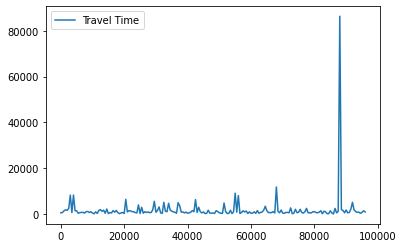

In [64]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.legend()
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Time Travelled(seconds)')]

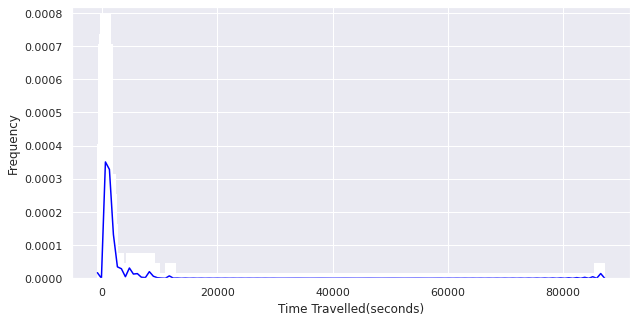

In [65]:
# PDF of time travel attributes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
# settings for seaborn plotting style

# settings for seaborn plot sizes

ax = sns.distplot(k,
                  bins=500,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Time Travelled(seconds)', ylabel='Frequency')

# Findings :- Frequency count of low time  travel is high and for high duration of time is very low

In [66]:
# gives bike status and its corresponding status
data = pd.read_csv("/content/free_bike_status.csv") 
data.head()

,data__bikes__type,data__bikes__bike_id,data__bikes__lat,data__bikes__rental_uris__android,data__bikes__rental_uris__ios,data__bikes__is_disabled,data__bikes__is_reserved,data__bikes__lon,data__bikes__name,last_updated,ttl
0,electric_bike,2aca07458f9283c67877dacd6088501a,38.919425,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.041747,2aca07458f9283c67877dacd6088501a,1.599427e+09,5.0
1,electric_bike,c34779018b95a257521c34ea13f69a0f,39.040619,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.050326,c34779018b95a257521c34ea13f69a0f,NaN,NaN
2,electric_bike,3ae93b6b7b996d51e3c566c0a4279f0f,38.914053,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-76.974587,3ae93b6b7b996d51e3c566c0a4279f0f,NaN,NaN
3,electric_bike,b030e5dd3c17a093e01b0c64ca258d6a,39.083747,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.151204,b030e5dd3c17a093e01b0c64ca258d6a,NaN,NaN
4,electric_bike,2531a4484ecd840fdbcbe3fc6685ef11,38.956336,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-76.979038,2531a4484ecd840fdbcbe3fc6685ef11,NaN,NaN


In [67]:
#gives information about stations in the whole system
data = pd.read_csv("/content/station_information.csv") 
data.head()



,data__stations__rental_methods__001,data__stations__rental_methods__002,data__stations__capacity,data__stations__station_id,data__stations__name,data__stations__electric_bike_surcharge_waiver,data__stations__region_id,data__stations__short_name,data__stations__legacy_id,data__stations__lat,data__stations__rental_uris__android,data__stations__rental_uris__ios,data__stations__eightd_has_key_dispenser,data__stations__lon,data__stations__external_id,data__stations__station_type,data__stations__has_kiosk,last_updated,ttl
0,KEY,CREDITCARD,15,1,Eads St & 15th St S,False,41.0,31000,1,38.858971,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.053230,082469cc-1f3f-11e7-bf6b-3863bb334450,classic,True,1.599427e+09,5.0
1,KEY,CREDITCARD,11,2,18th St & S Eads St,False,41.0,31001,2,38.857250,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.053320,08246b69-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
2,KEY,CREDITCARD,17,3,Crystal Dr & 20th St S,False,41.0,31002,3,38.856425,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.049232,08246c35-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
3,KEY,CREDITCARD,11,4,Crystal Dr & 15th St S,False,41.0,31003,4,38.860170,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.049593,08246cd5-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
4,KEY,CREDITCARD,11,5,Aurora Hills Cmty Ctr / 18th St & S Hayes St,False,41.0,31004,5,38.857866,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.059490,08246d68-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN


In [68]:
#produce station status and avaibility of bikes in it 

data = pd.read_csv("/content/station_status.csv") 
data.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN
